In [4]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T
from torchvision import io
from torchsummary import summary
import json
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#print(torch.__version__, torchvision.__version__) проверка если не работает

In [6]:
# скачиваем файл с классами
!wget https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json

--2023-01-20 12:30:51--  https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
Распознаётся s3.amazonaws.com (s3.amazonaws.com)… 54.231.192.184, 52.216.88.13, 52.217.204.88, ...
Подключение к s3.amazonaws.com (s3.amazonaws.com)|54.231.192.184|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 35363 (35K) [application/octet-stream]
Сохранение в: «imagenet_class_index.json.1»

imagenet_class_inde 100%[===================>]  34,53K  --.-KB/s    за 0,1s    

2023-01-20 12:30:52 (277 KB/s) - «imagenet_class_index.json.1» сохранён [35363/35363]



In [7]:
#!head imagenet_class_index.json проверка классов

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' #или device = 'cpu' если нет GPU
print(device)

cuda


In [9]:
# делаем словарь, чтобы по индексу найти название класса
labels = json.load(open('./imagenet_class_index.json'))
# функция декодировки
decode = lambda x: labels[str(x)][1]

In [10]:
#decode(112) #проверка decode

In [11]:
# загружаем модель

model = torch.hub.load("pytorch/vision:v0.10.0", "mobilenet_v3_small", pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /home/user/.cache/torch/hub/v0.10.0.zip
/home/user/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/user/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /home/user/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth


  0%|          | 0.00/9.83M [00:00<?, ?B/s]

In [12]:
resize = T.Resize((224, 224)) # подгоняем размер под стандарт модели

In [7]:
#!!!!!!!!!!!!!!!!!!СЮДА вставляем код по загрузке изображения
# test_image.jpg = ............
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kfLYCNCU_KwLk0G4SOXaJqESzlddi8Yk' -O image2.jpg

In [13]:
img = resize(io.read_image('test_image.jpg')/255)

RuntimeError: [Errno 2] No such file or directory: 'test_image.jpg'

In [96]:
#img.shape # проверка размера

torch.Size([3, 224, 224])

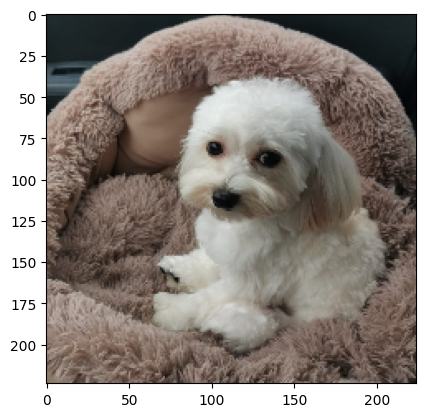

In [97]:
#plt.imshow(torch.permute(img, (1, 2, 0))) # проверка что изображение подгрузилось

In [8]:
# model проверка, что модель подгружена

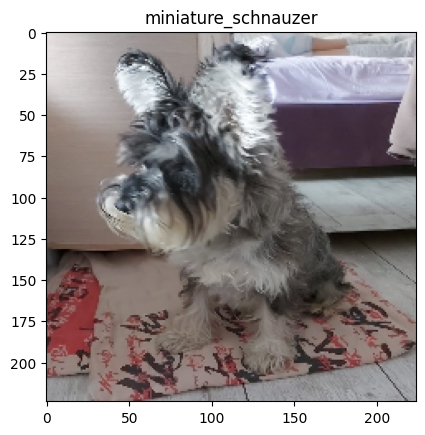

In [31]:
model.to(device)
model.eval()
class_title = decode(model(img.to(device).unsqueeze(0)).argmax().item()) #  возвращаю в исходную программу/ для ответа боту класс картинки
#исходная картинка уже есть в памяти - лучше использовать ее
#plt.imshow(torch.permute(img, (1, 2, 0)))
#plt.title(decode(model(img.to(device).unsqueeze(0)).argmax().item()));